 TP  noté 1 : La propagation d'un phénomène près de Granville
 =====

1 - Introduction 
------


L’objectif de ce TP est de faire une synthèse des notions abordées dans les précédents TP.

Le TP sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
**<span style="color:red"> À part si cela est précisé, vous ne devez pas utiliser directement de boucle (`for`,`while`) ou de branchement conditionnel (`if`) durant ce TP.</span>.**

**<span style="color:red"> 
Ce TP sera noté. Vous rendrez le code que vous avez réalisé en fin de séance sur la plateforme ecampus. N’oubliez pas de mettre votre nom et votre numéro d’étudiant dans les commentaires du fichier. Vous rendrez également un compte-rendu de TP où vous présenterez ce que vous avez fait et répondrez aux questions du TP. Vous mettrez le plus d’images possible pour illustrer vos explications. Ce rapport est à rendre sur ecampus dans un délai d’une semaine. Aucun rendu par mail n’est accepté.</span>**

**<span style="color:blue"> Ce sujet utilise des générateurs aléatoires. Il est donc normal que vous n'obteniez pas exactement les même valeurs que les exemples de résultat donnée.</span>**

In [7]:
import numpy as np
import scipy as sc
import scipy.spatial
import matplotlib.pyplot as plt
import pickle

2 - Affichage des villes de la Manche
---

Vous avez a votre disposition le fichier "villes_normandie.csv". En utilisant l'instruction np.loadtxt, créez une matrice numpy LLD dont chaque ligne représente une ville, la première colonne contient le numéro du département, la seconde la latitude et la troisième colonne la longitude.

In [8]:
LLD = np.loadtxt('villes_normandie.csv', delimiter=';',dtype=np.string_,usecols=(4, 11, 12),skiprows=1)
#print(LLD)

OSError: villes_normandie.csv not found.

En utilisant la matrice LLD, créez deux matrices numpy. La première coordN ou chaque ligne contient la latitude
et la longitude de tous les villes de Normandie. La seconde coordMa ou chaque ligne contient 
la latitude et la longitude uniquement des villes du département de la Manche.

In [6]:
coordN = LLD[:,1:3]
coordMa = LLD[LLD[:,0] == '50', 1:3]

print('dimension de coordN: ', coordN.shape)
print('dimension de coordMa:', coordMa.shape)

NameError: name 'LLD' is not defined

En utilisant le TP4, calculez les coordonnées euclidiennes des villes de Normandie et des villes de la Manche.
Stockez les coordonnées 3D des villes de Normandie dans un tableau coord_villesN et les coordonnées 3D des villes de La Manche dans un tableau coord_villesMa.

In [9]:
R = 6367.445

def convert3D(u): 
    
    xyz = np.zeros((u.shape[0],3))
    xyz[:,0] = R*np.cos(u[:,0]*np.pi/180)*np.sin(u[:,1]*np.pi/180)
    xyz[:,1] = R*np.cos(u[:,0]*np.pi/180)*np.cos(u[:,1]*np.pi/180)
    xyz[:,2] = R*np.sin(u[:,0]*np.pi/180)
    return xyz

coord_villesN = convert3D(coordN.astype(np.float))
coord_villesMa = convert3D(coordMa.astype(np.float))

NameError: name 'coordN' is not defined

Affichez sur la même figure les villes de Normandie sous la forme des points de coordonnees (x,-y) en bleu et les villes de la Manche en Rouge.

In [10]:
plt.scatter(coord_villesN[:,0], -coord_villesN[:,1], c='b')
plt.scatter(coord_villesMa[:,0], -coord_villesMa[:,1], c='r')

plt.show()

NameError: name 'coord_villesN' is not defined

Calculez la distance euclidienne entre toutes les villes de Normandie. Le résultat sera sous la forme d'une matrice `distN` 
dont les coordonnées $i,j$ donne la distance entre la ville $i$ et la ville $j$. 
Faites de la même manière pour la distance euclidienne entre toutes les villes de La Manche. 
Le résultat sera sous la forme d'une matrice `distMa`.

In [11]:
md = sc.spatial.distance.pdist(coord_villesN)
distN = sc.spatial.distance.squareform(md)

md1 = sc.spatial.distance.pdist(coord_villesMa)
distMa = sc.spatial.distance.squareform(md1)

print('Dimension de distN', distN.shape)
print('Dimension de distMa', distMa.shape)

NameError: name 'coord_villesN' is not defined

En considérant le tableau des villes de la Manche, Granville est la ville d'indice 294. Récupérez les indices des 50 villes de la Manche les plus proches de Granville. Puis Récupérez les distances de ces 50 villes par rapport à Granville. 

In [12]:
indiceMa_Granville=294

In [13]:
distance_ma = distMa[indiceMa_Granville]
indice_ma = np.argsort(distance_ma)

indice_ma_50 = indice_ma[1:51]

distance_ma_50 = distance_ma[indice_ma_50]

print(indice_ma_50)
print("")
print(distance_ma_50)

NameError: name 'distMa' is not defined

Définissez la variable coordMa_proche_Granville contenant
les coordonnées euclidiennes des 50 villes de La Manche les plus proches de Granville.

In [14]:
coordMa_proche_Granville = coord_villesMa[indice_ma_50]
print(coordMa_proche_Granville.shape)

NameError: name 'coord_villesMa' is not defined

En considérant le tableau de toutes les villes de Normandie, Granville est la ville d'indice 943. 
Récupérez les indices des 50 villes de Normandie les plus proches de Granville. 
Puis récuperez les distances de ces 50 villes par rapport à Granville.


In [11]:
distance_n = distN[943]
indice_n = np.argsort(distance_n)

indice_n_50 = indice_n[1:51]

distance_n_50 = distance_n[indice_n_50]

print(indice_n_50)
print(distance_n_50)

[ 936 1002 1017  969  922 1004  991  932  889  950  920  878  784  924
 1005  930  768  788  880  958  820  806  799  968  980  823  895  954
  819  928  914  787  786  798  964  774  947  851 1015  835  988  976
  960  948  840  961  821  802 1013  772]
[ 3.06182312  3.06240186  4.09938207  4.09938207  5.20509268  6.37221452
  8.20196929  8.24630346  9.18933407  9.30129171  9.59190209  9.75375981
  9.95829129 11.08464323 11.12643913 11.29751799 11.80550366 12.13824119
 12.67839074 12.73873816 13.40431364 13.54092327 13.54092327 13.85041694
 14.00709815 14.27371087 14.36571618 14.74503929 15.09706833 15.30269436
 15.59768584 15.6253692  15.65715195 15.84991783 16.27194052 17.06909001
 17.36662043 17.42785797 17.48648509 17.50554476 17.73271626 17.74647614
 17.94266536 18.20000692 18.3849087  18.64275433 18.66569556 18.73348514
 19.1786825  19.1992134 ]


Définissez la variable coordN_proche_Granville contenant
les coordonnées euclidiennes des 50 villes de Normandie les plus proches de Granville.

In [12]:
coordN_proche_Granville = coord_villesN[indice_n_50]
print(coordN_proche_Granville.shape)


(50, 3)


Affichez sur une figure les 50 villes de La Manche les plus proches de Granville avec des ronds en bleu et 
les 50 villes de Normandie les plus proches de Granville avec des carrés en rouge (plus grandes que les ronds en bleus)
(Afficher sous forme des points de coordonnees (x,-y) ). Que remarquez vous?

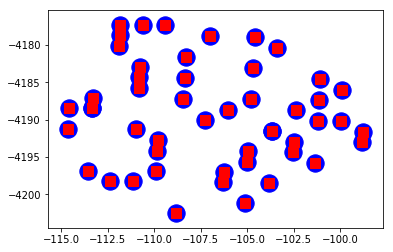

In [13]:
plt.scatter(coordMa_proche_Granville[:,0], -coordMa_proche_Granville[:,1], c='b', marker='o', s=300)

plt.scatter(coordN_proche_Granville[:,0], -coordN_proche_Granville[:,1], c='r', marker='s', s=100)

plt.show()

coordN_proche_Granville=coordMa_proche_Granville??

In [14]:
print((coordMa_proche_Granville == coordN_proche_Granville).all())
#Oui les deux sont egales

True


Peut-on trouver une ville en dehors de la Manche qui soit plus proche de Granville que Cherbourg-Octeville, 
la ville de la Manche d'indice 540? 
Expliquez.

In [33]:
#print(coord_villesMa[540] < coordMa_proche_Granville)

3 - Visualition d'une  propagation près de Granville.
---

Nous allons dans ce TP visualiser la propagation d'un phénomène, entre les  villes de la Manche situées a moins de 20 km de Granville. Récupérez d'abord les indices de ces  villes dans une variable indice. Puis définissez les variables coord_p_Granville et dist_p_Granville contenant respectivement les coordonnées 3D des ces villes et les distances entre elles.

In [20]:
bar = distMa[indiceMa_Granville] + 20.0
ville_20_km = distMa[distMa < distMa[indiceMa_Granville]]
print(ville_20_km.shape)
#print(coordMa.astype(np.float)[287])
#print(coordMa.astype(np.float)[indiceMa_Granville])

(165865,)


 On va sélectionner aléatoirement quelques villes des villes précédentes  en effectuant des tirages aléatoires entre 0 et 1 pour toutes les villes de la Manche situées à moins de 20 km de Granville, que vous placerez dans un tableau nommé `i_villes_src`.

In [16]:
n = 55
i_villes_src = np.random.rand(n)
#print(i_villes_src)

Seules les villes pour lequelles on tire une valeur inférieure à 0.3 seront sélectionnées. Définissez un tableau `villes_sources` de taille 55 qui contient True pour les villes sélectionnées  et False sinon.



In [17]:
villes_sources = i_villes_src < 0.3
print(villes_sources)

[False False  True False False False False False False False  True False
  True  True False  True False  True  True False False False  True False
 False  True  True  True False False False False False False False False
 False False False  True  True False False False False False  True  True
 False False False False False False False]


Définissez un variable $s$ égale à 4. Vous pourrez changer par la suite cette valeur pour accélérer ou ralentir la propagation.

In [63]:
s=4
print(villes_sources.shape)

(55,)


Tirez selon une loi normale centrée réduite les valeurs d’une matrice nommée `villes_choisies`. Cette matrice aura la même taille que la matrice `dist_p_Granville`. Elle va nous permettre de choisir les villes où à lieu la propagation en fonction de leurs distances aux villes initiales.

In [59]:
villes_choisies = np.random.standard_normal(n)

Multipliez les valeurs de la matrice `villes_choisies` par $s$ pour fixer la vitesse de propagation. 

In [62]:
villes_choisies = villes_choisies*s

Construisez une nouvelle matrice `villes_propagation_potentielle` qui contient True pour les valeurs dans 'villes_choisies' dont la valeur absolue est plus grand que les valeurs dans dist_p_Granville et False pour les autres. Cette matrice permet de connaître de quelles villes et vers quelles villes se font les propagations. 
Les villes selon les lignes indiquent les villes sources, les villes en colonnes sont les villes destinations. Pour l'instant on considère que toute ville peut être source.

In [66]:
villes_propagation_potentielle = np.abs(villes_choisies)

Déclarez une variable `villes_propagation_potentielle2` qui est égale `villes_propagation_potentielle` auquel on soustrait une matrice identité de même dimension. 

En utilisant la matrice`ville_sources`et `villes_propagation_potentielle2`, construisez une matrice M semblable à `villes_propagation_potentielle2` dont seul les lignes correspondant aux villes sources contiennent des valeurs différentes de 0.

Construisez un vecteur `villes_destinations` recensant toutes les villes destinations. Ce vecteur contiendra True aux positions des villes destinations et False pour les autres. Pour répondre, vous utiliserez notamment une sommation bien choisie sur la matrice précédente.

Affichez avec des carrés bleus les villes de la Manche situées à moins de 20 km de Granville, avec des ronds rouges les villes sources et avec des carrés verts les villes destinations. Un affichage qui répond aux contraintes précédentes et qui ne serait pas exactement similaire au rendu du sujet, convient parfaitement.

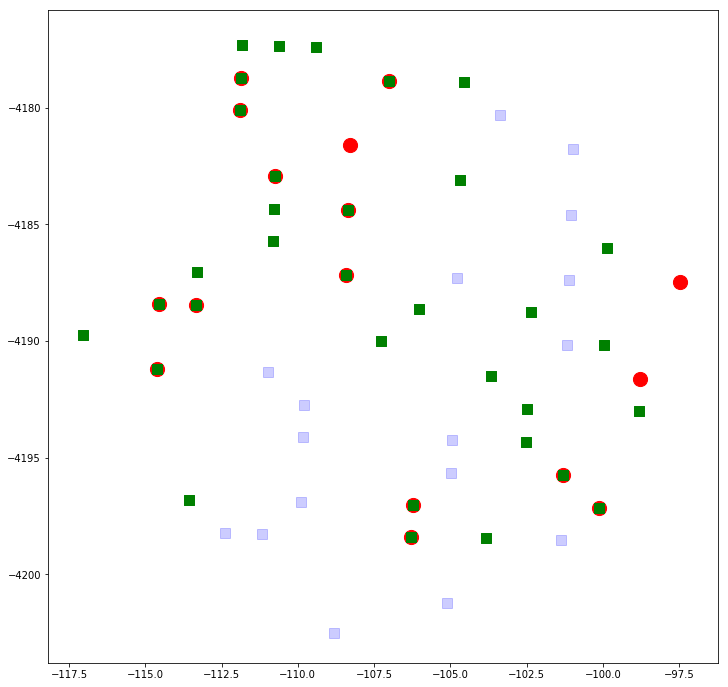

4 - Graphe de propagation
---

L'objectif de cette partie est de visualiser dans quel sens se font les propagations. Nous souhaitons créé un graphe permettant de visualiser avec des flèches les villes sources et destinations de nos propagations. 

Créez un vecteur de valeurs de 0 à 55 non compris que vous nommerez `noeuds`. Ce vecteur liste les numéros de villes.

Créez une matrice de la même taille que `M` indiquant les noeuds sources possible. Vous nommerez cette matrice `a`.

[[ 0  1  2 ... 52 53 54]
 [ 0  1  2 ... 52 53 54]
 [ 0  1  2 ... 52 53 54]
 ...
 [ 0  1  2 ... 52 53 54]
 [ 0  1  2 ... 52 53 54]
 [ 0  1  2 ... 52 53 54]]


Concaténez `a` et `a.T` selon l'axe de profondeur. stockez le résultat dans une variable a2

Dimension de a2 (55, 55, 2)
valeur de a2 [[[ 0  0]
  [ 0  1]
  [ 0  2]
  ...
  [ 0 52]
  [ 0 53]
  [ 0 54]]

 [[ 1  0]
  [ 1  1]
  [ 1  2]
  ...
  [ 1 52]
  [ 1 53]
  [ 1 54]]

 [[ 2  0]
  [ 2  1]
  [ 2  2]
  ...
  [ 2 52]
  [ 2 53]
  [ 2 54]]

 ...

 [[52  0]
  [52  1]
  [52  2]
  ...
  [52 52]
  [52 53]
  [52 54]]

 [[53  0]
  [53  1]
  [53  2]
  ...
  [53 52]
  [53 53]
  [53 54]]

 [[54  0]
  [54  1]
  [54  2]
  ...
  [54 52]
  [54 53]
  [54 54]]]


Redimensionnez la matrice précédente pour ne garder que les lignes et 2 colonnes. Vous nommerez cette matrice `i_noeuds`.

[[ 0  0]
 [ 0  1]
 [ 0  2]
 ...
 [54 52]
 [54 53]
 [54 54]]
(3025,) (3025, 2)


En utilisant la matrice précédente. Faites une liste de tout les propagations. La première colonne indique le numéro de la ville source et la deuxième colonne le numéro de la ville destination. Vous nommerez cette matrice `fleches`.

A votre avis que fait la fonction suivante ? 

In [76]:
def printGraph(coord,fleches,villes_sources):
    plt.figure(figsize=(15,15))
    ax = plt.axes()
        
    ax.axis('equal')
    ax.quiver(coord[fleches[:,0],0], 
              coord[fleches[:,0],1],
              coord[fleches[:,1],0]-coord[fleches[:,0],0],
              coord[fleches[:,1],1]-coord[fleches[:,0],1],
              scale=1.1, units='xy',
              headwidth = 7
    )
    
    ax.scatter(coord[:,0],coord[:,1],s=100)
    ax.scatter(coord[villes_sources,0],coord[villes_sources,1],s=100,color='r')
    plt.show()

Utilisez la fonction précédente avec les données du TP. 

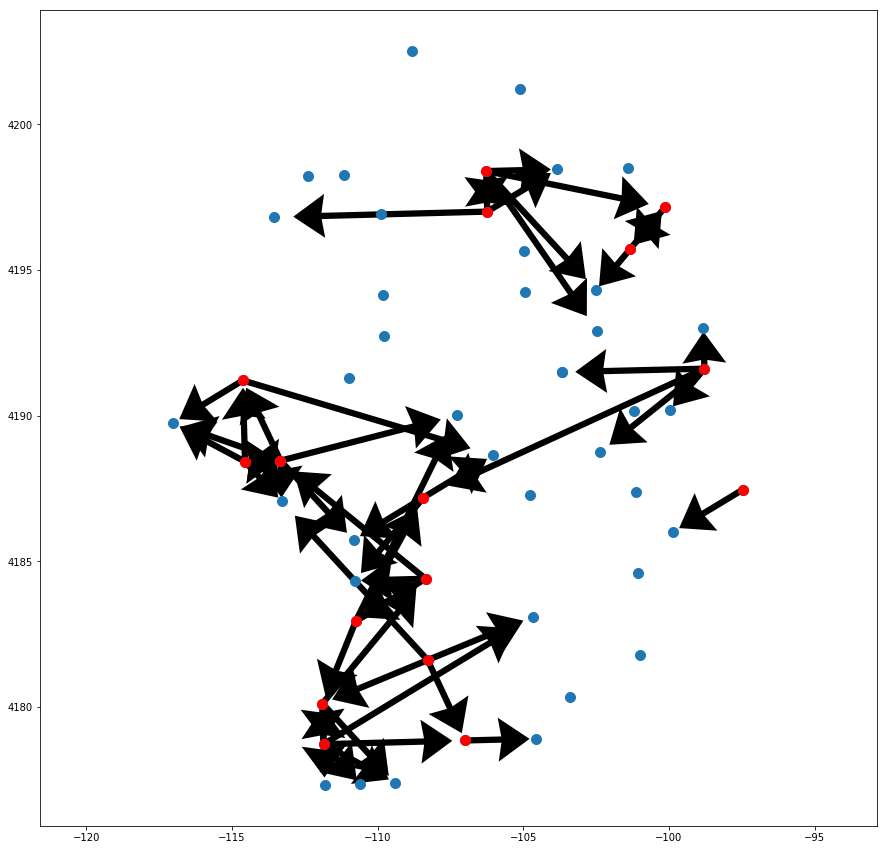